In [255]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
""" I. Bloch
"""


#%% SECTION 1 inclusion of packages 


import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
# necessite scikit-image 
from skimage import io as skio
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import img_as_float
from skimage.segmentation import chan_vese
from skimage.segmentation import checkerboard_level_set
from skimage.segmentation import disk_level_set

In [256]:
#%% SECTION 2 - Input image

im=skio.imread('coeurIRM.bmp')

#im=skio.imread('retineOA.bmp')

#im=skio.imread('brain.bmp')
#im=im[:,:,1]

#im=skio.imread('brain2.bmp')

plt.imshow(im, cmap="gray", vmin=0, vmax=255)

<IPython.core.display.Javascript object>


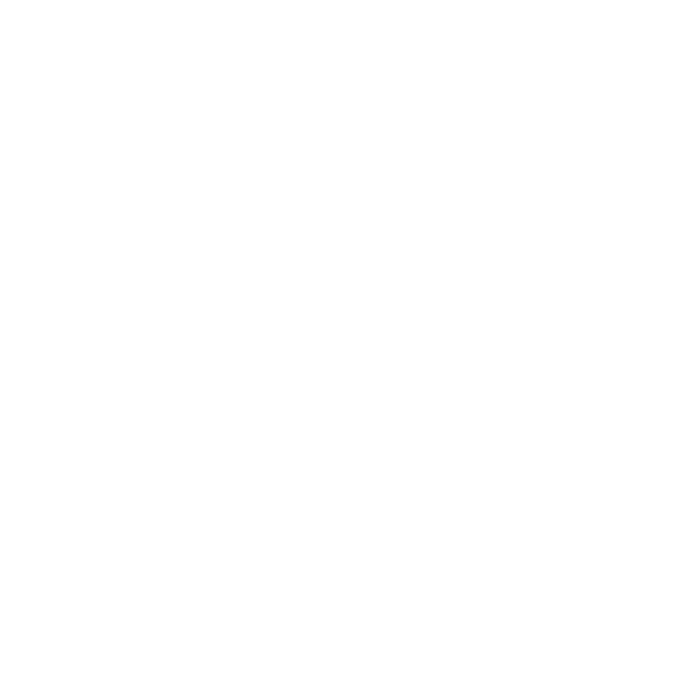

In [257]:
#%% SECTION 3a - Segmentation using active contours 
s = np.linspace(0, 2*np.pi, 100)
r = 140 + 16*np.sin(s)
c = 130 + 16*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 4.5),
                       init, alpha=0.1, beta=55, w_line = -5, w_edge=80, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

<IPython.core.display.Javascript object>


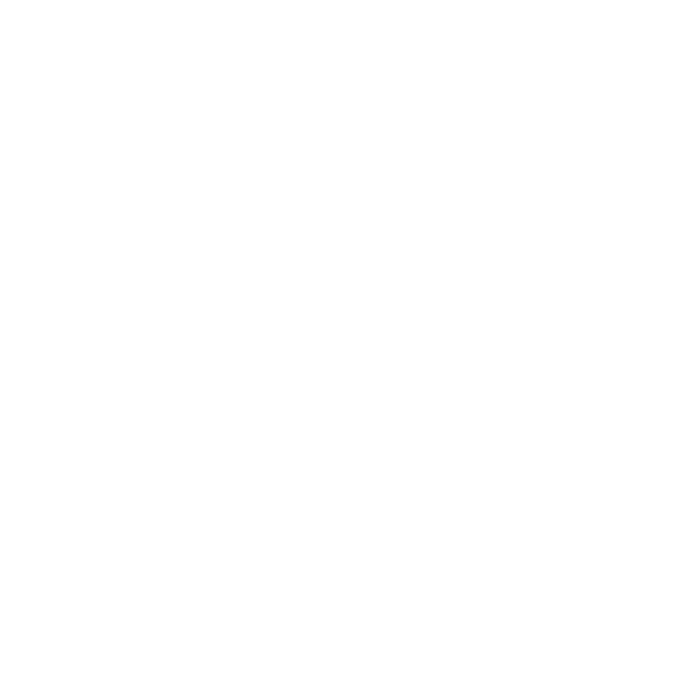

<IPython.core.display.Javascript object>


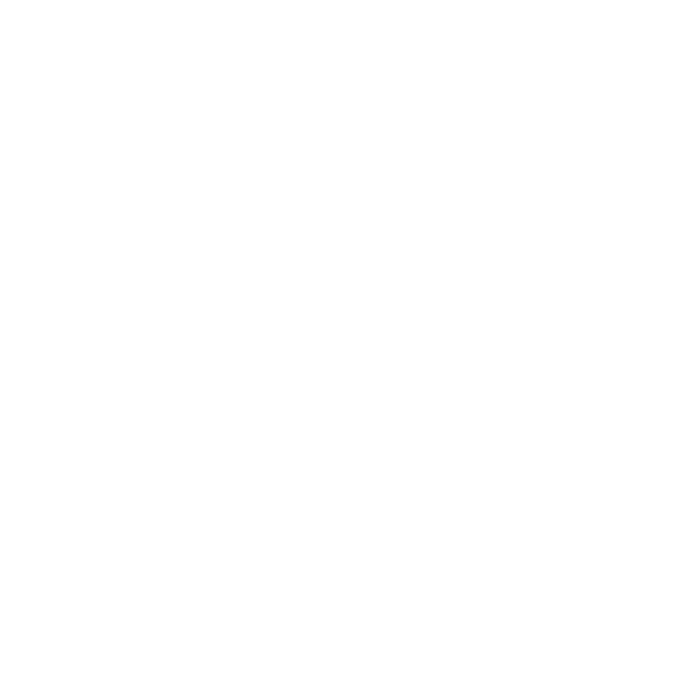

<IPython.core.display.Javascript object>


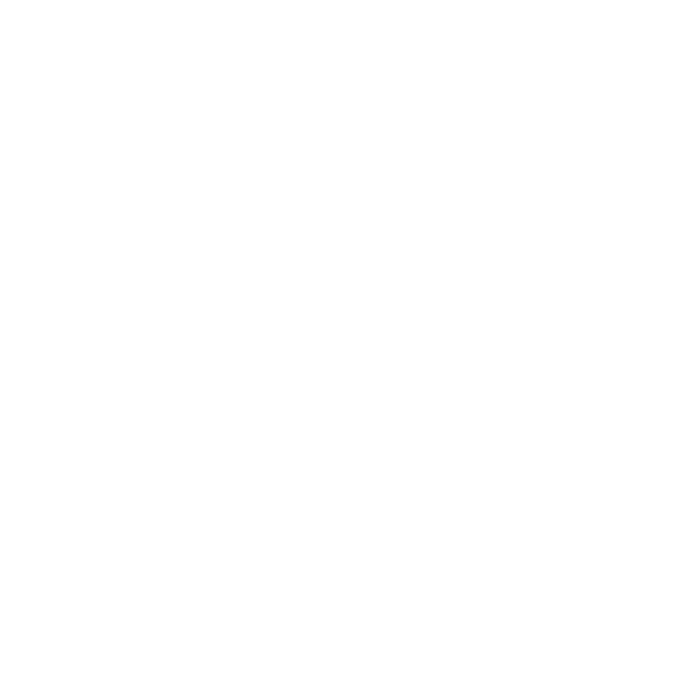

<IPython.core.display.Javascript object>


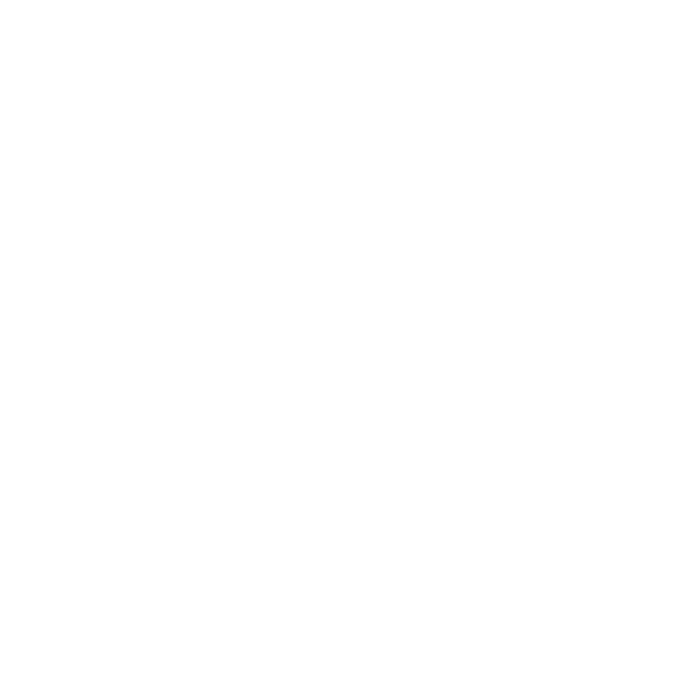

In [258]:
#%% SECTION 3a - Segmentation using active contours 

s = np.linspace(0, 2*np.pi, 100)
r = 140 + 16*np.sin(s)
c = 130 + 16*np.cos(s)
init = np.array([r, c]).T

for alpha in [0.01,0.05,0.1,0.5]:
    snake = active_contour(gaussian(im, 4.5),
                       init, alpha=alpha, beta=55, w_line = -5, w_edge=80, gamma=0.001)


    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(im, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, im.shape[1], im.shape[0], 0])

    plt.show()

<IPython.core.display.Javascript object>


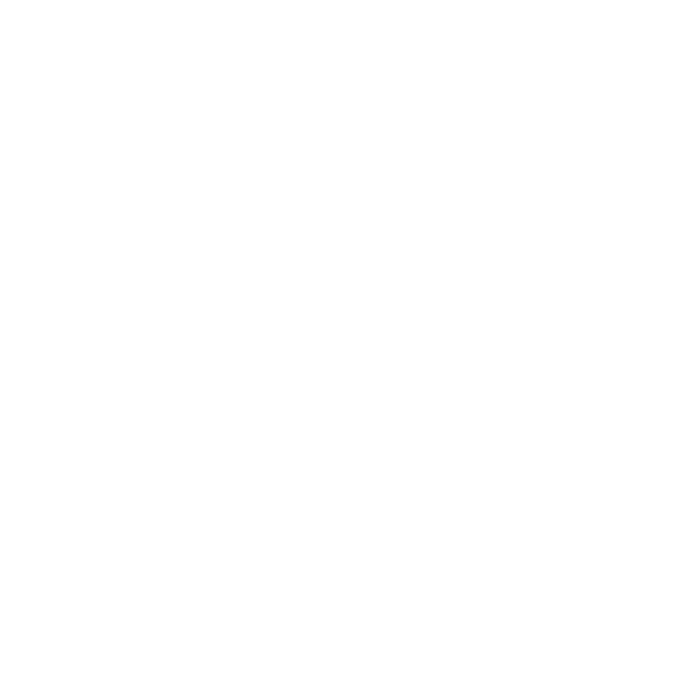

<IPython.core.display.Javascript object>


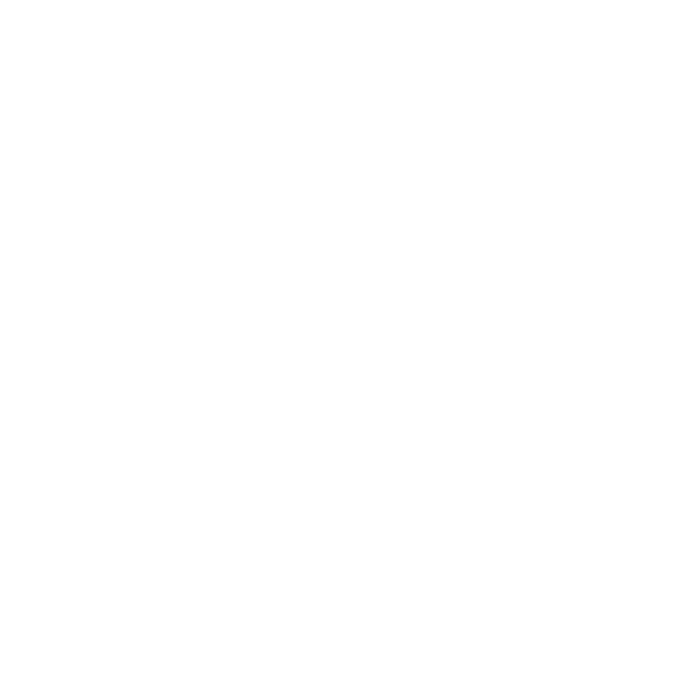

<IPython.core.display.Javascript object>


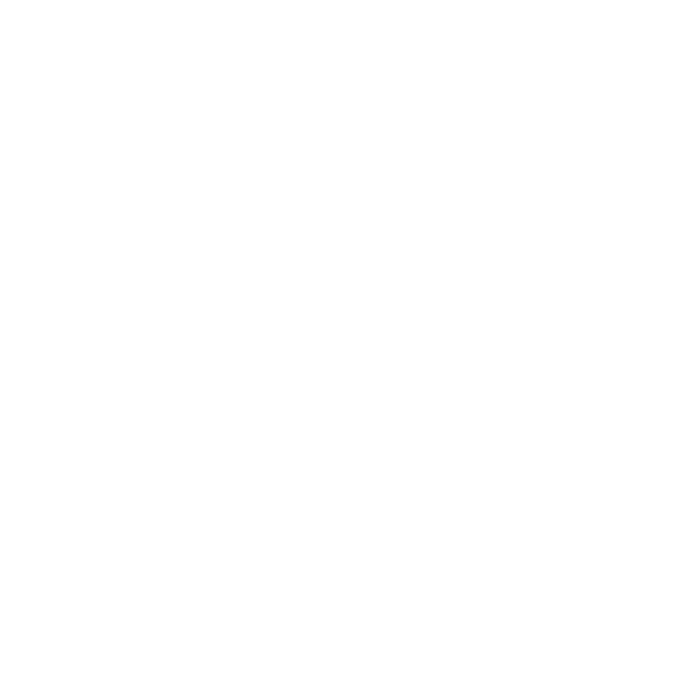

<IPython.core.display.Javascript object>


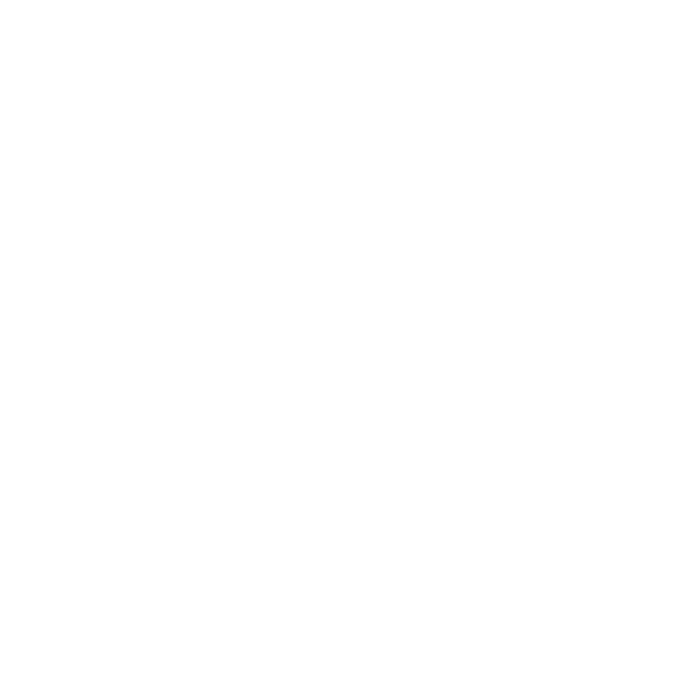

In [259]:
#%% SECTION 3a - Segmentation using active contours 

s = np.linspace(0, 2*np.pi, 100)
r = 140 + 16*np.sin(s)
c = 130 + 16*np.cos(s)
init = np.array([r, c]).T

for beta in [15,30,45,60]:
    snake = active_contour(gaussian(im, 4.5),
                       init, alpha=0.1, beta=55, w_line = -5, w_edge=80, gamma=0.001)


    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(im, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, im.shape[1], im.shape[0], 0])

    plt.show()

<IPython.core.display.Javascript object>


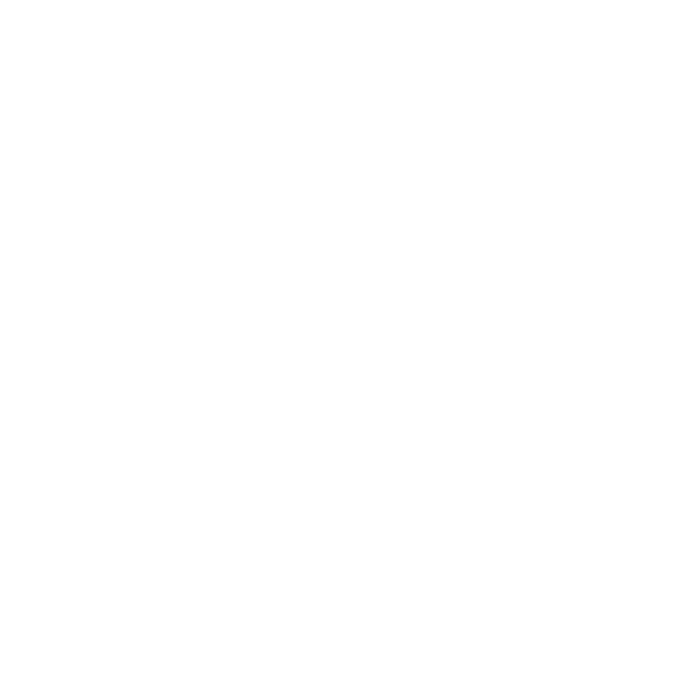

<IPython.core.display.Javascript object>


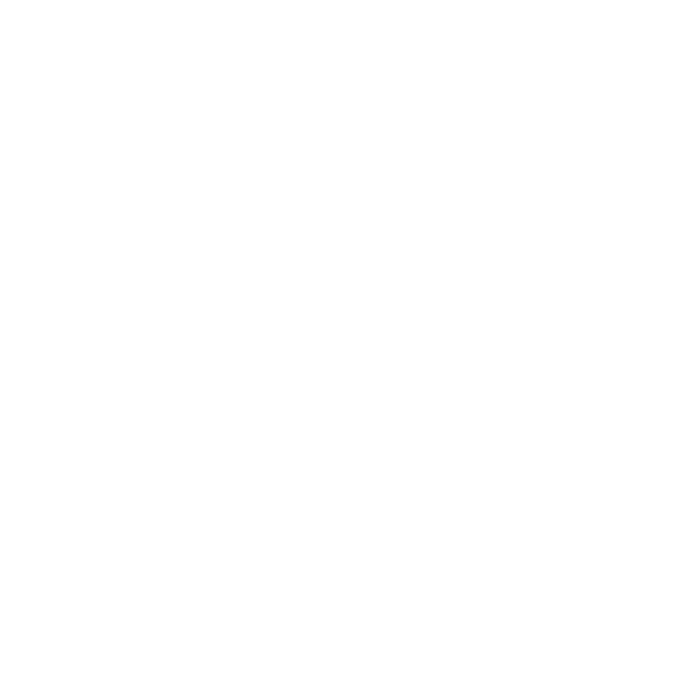

<IPython.core.display.Javascript object>


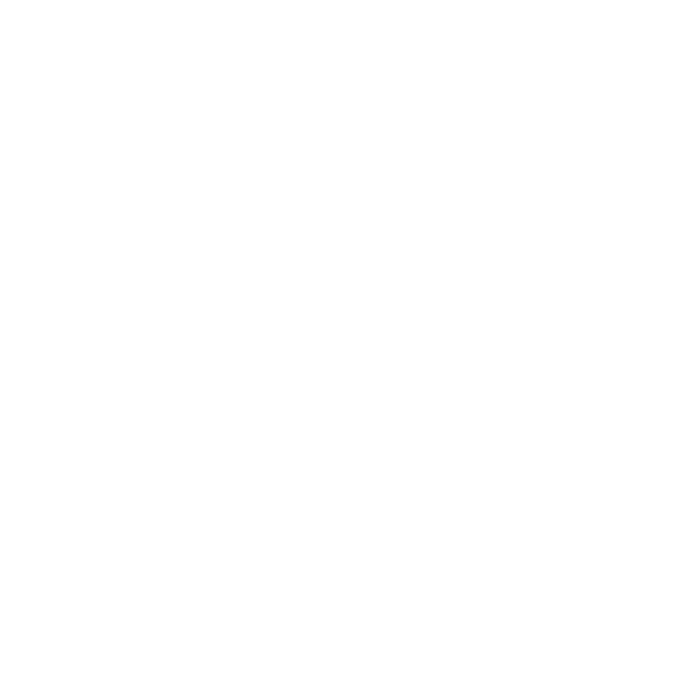

<IPython.core.display.Javascript object>


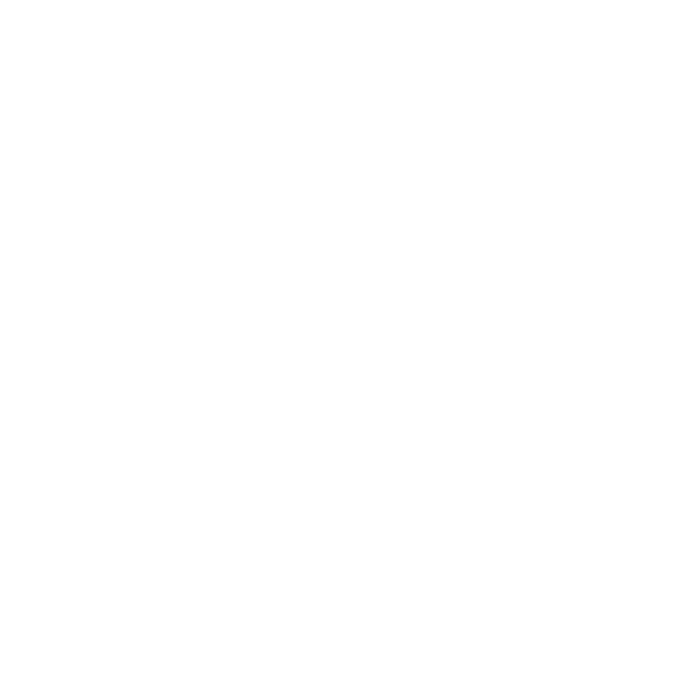

In [260]:
#%% SECTION 3a - Segmentation using active contours 

s = np.linspace(0, 2*np.pi, 100)
r = 140 + 16*np.sin(s)
c = 130 + 16*np.cos(s)
init = np.array([r, c]).T

for w_line in [-10,-5,5,10]:
    snake = active_contour(gaussian(im, 4.5),
                       init, alpha=0.1, beta=55, w_line = w_line, w_edge=80, gamma=0.001)


    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(im, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, im.shape[1], im.shape[0], 0])

    plt.show()

<IPython.core.display.Javascript object>


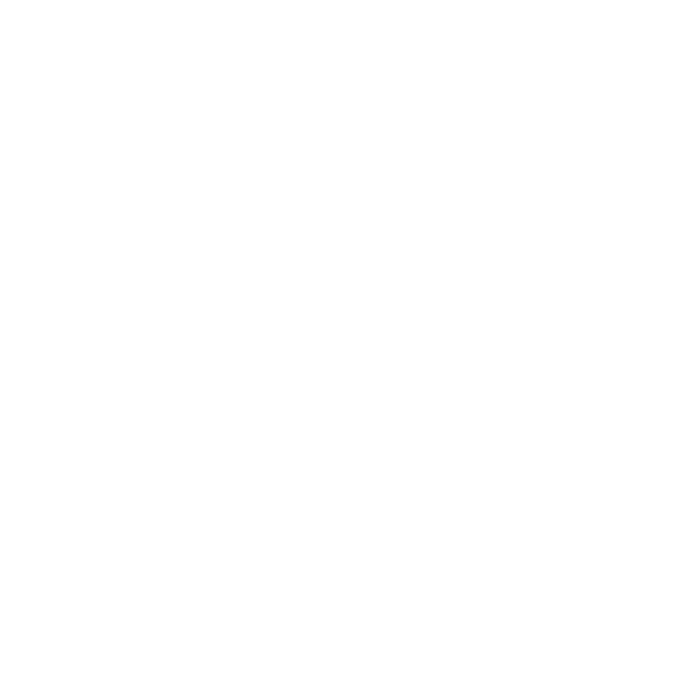

<IPython.core.display.Javascript object>


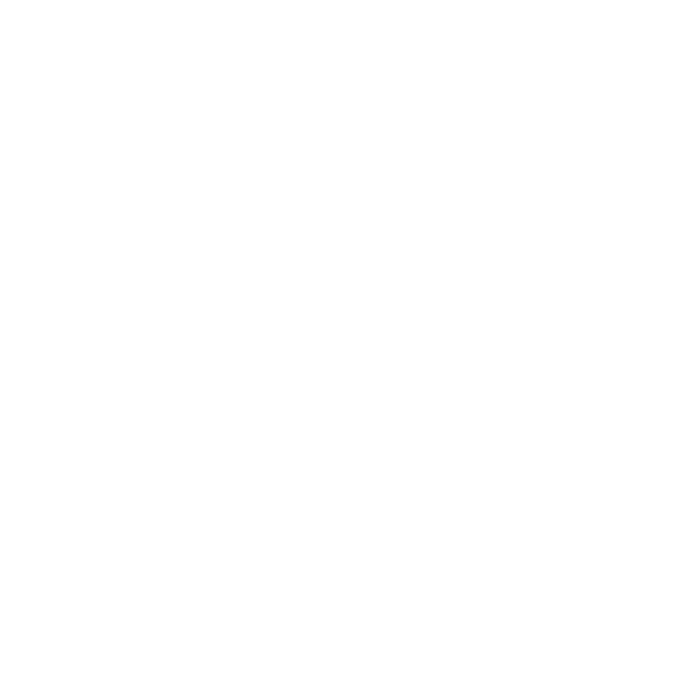

<IPython.core.display.Javascript object>


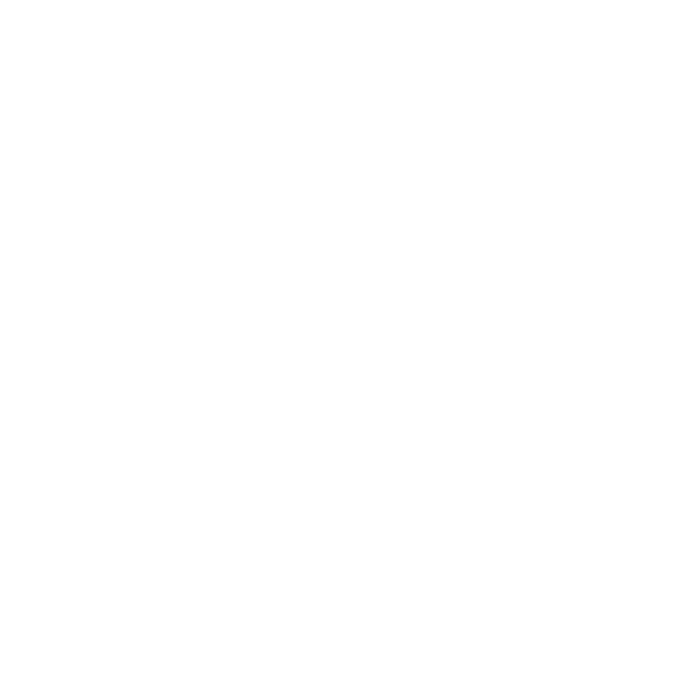

<IPython.core.display.Javascript object>


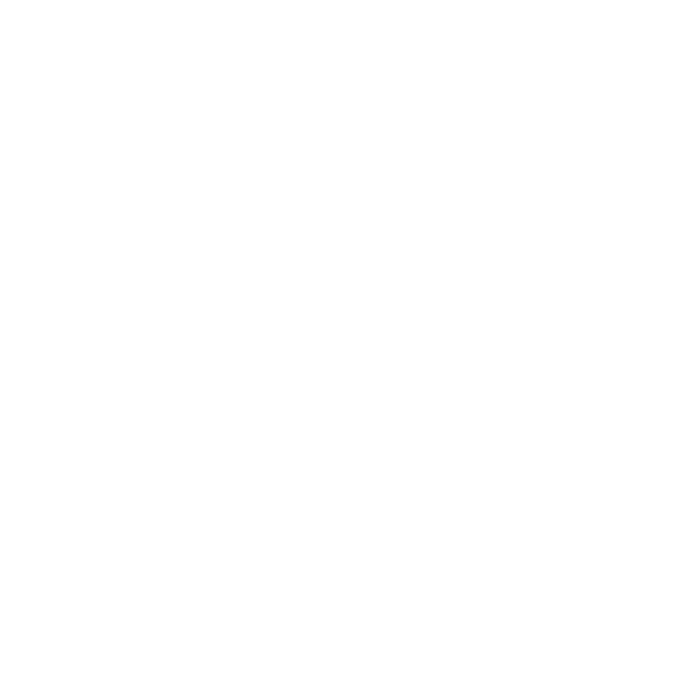

In [261]:
#%% SECTION 3a - Segmentation using active contours 

s = np.linspace(0, 2*np.pi, 100)
r = 140 + 16*np.sin(s)
c = 130 + 16*np.cos(s)
init = np.array([r, c]).T

for w_edge in [50,65,80,95]:
    snake = active_contour(gaussian(im, 4.5),
                       init, alpha=0.1, beta=55, w_line = -5, w_edge=w_edge, gamma=0.001)


    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(im, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, im.shape[1], im.shape[0], 0])

    plt.show()

<IPython.core.display.Javascript object>


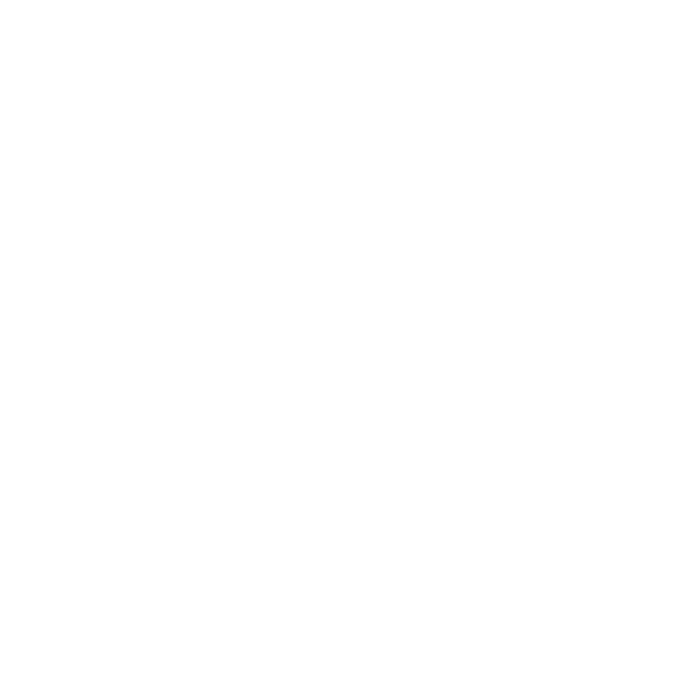

<IPython.core.display.Javascript object>


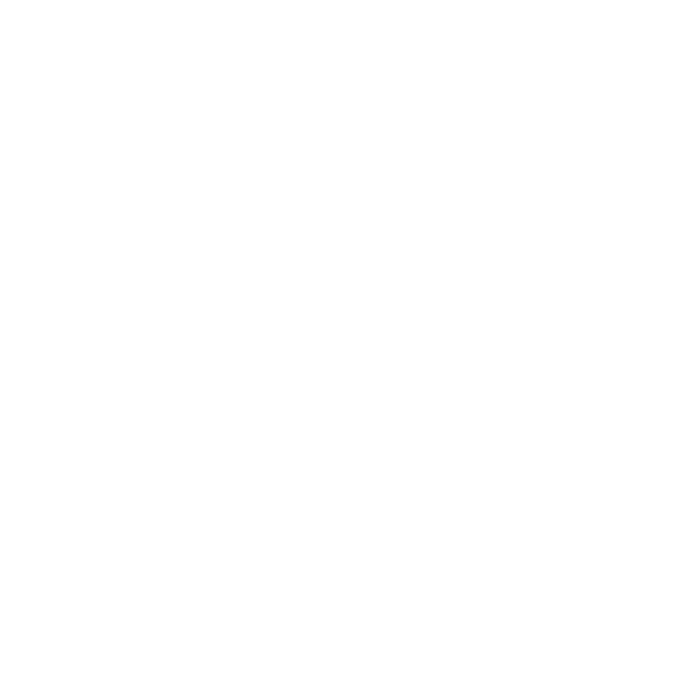

In [262]:
#%% SECTION 3a - Segmentation using active contours 

s = np.linspace(0, 2*np.pi, 100)
r = 140 + 16*np.sin(s)
c = 130 + 16*np.cos(s)
init = np.array([r, c]).T

for gamma in [0.001,3]:
    snake = active_contour(gaussian(im, 4.5),
                       init, alpha=0.1, beta=55, w_line = -5, w_edge=80, gamma=gamma)


    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(im, cmap=plt.cm.gray)
    ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
    ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, im.shape[1], im.shape[0], 0])

    plt.show()

C:\Users\pirio\AppData\Local\Temp\ipykernel_5504\82522161.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(9, 5))


<IPython.core.display.Javascript object>


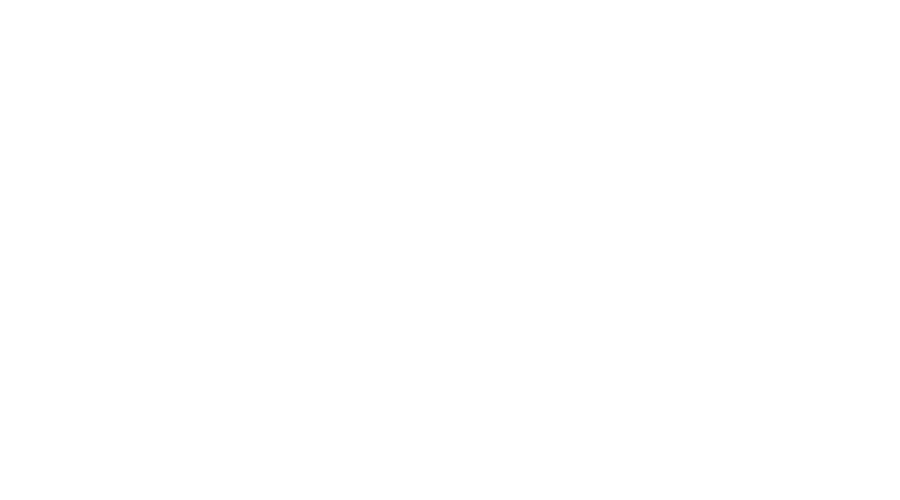

In [263]:
#%% SECTION 3b - Open contours

# Use retineOA.bmp

im=skio.imread('retineOA.bmp')

r = np.linspace(50, 245, 100)
c = np.linspace(5, 225, 100)
init = np.array([r, c]).T

snake = active_contour(gaussian(im, 1), init, boundary_condition='fixed',
                       alpha=0.01, beta=0.5, w_line=-1, w_edge=9, gamma=0.01)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(im, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, im.shape[1], im.shape[0], 0])

plt.show()

lambda1: 4


<IPython.core.display.Javascript object>


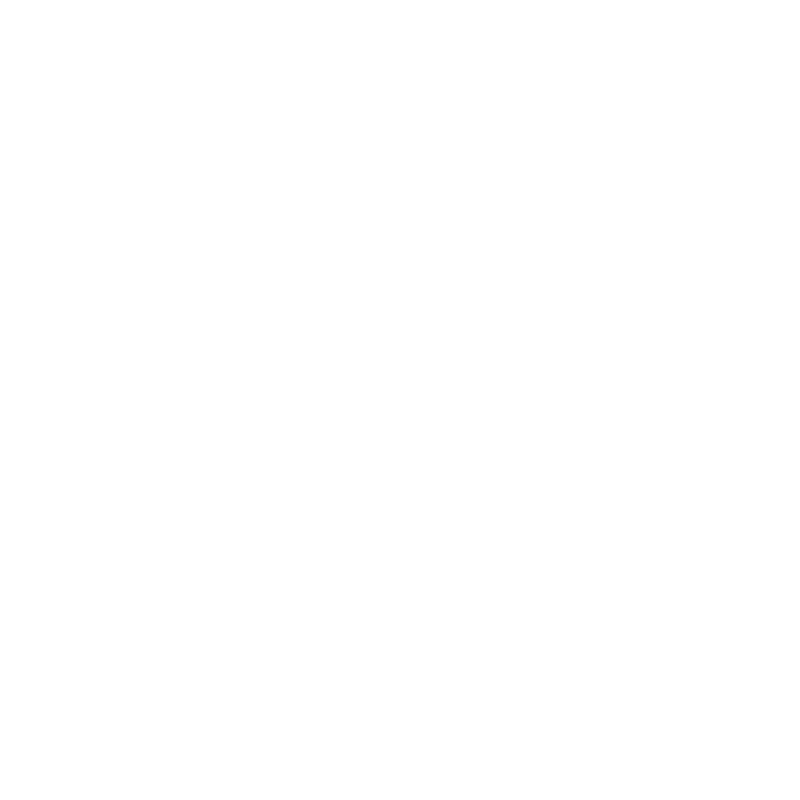

lambda1: 5


<IPython.core.display.Javascript object>


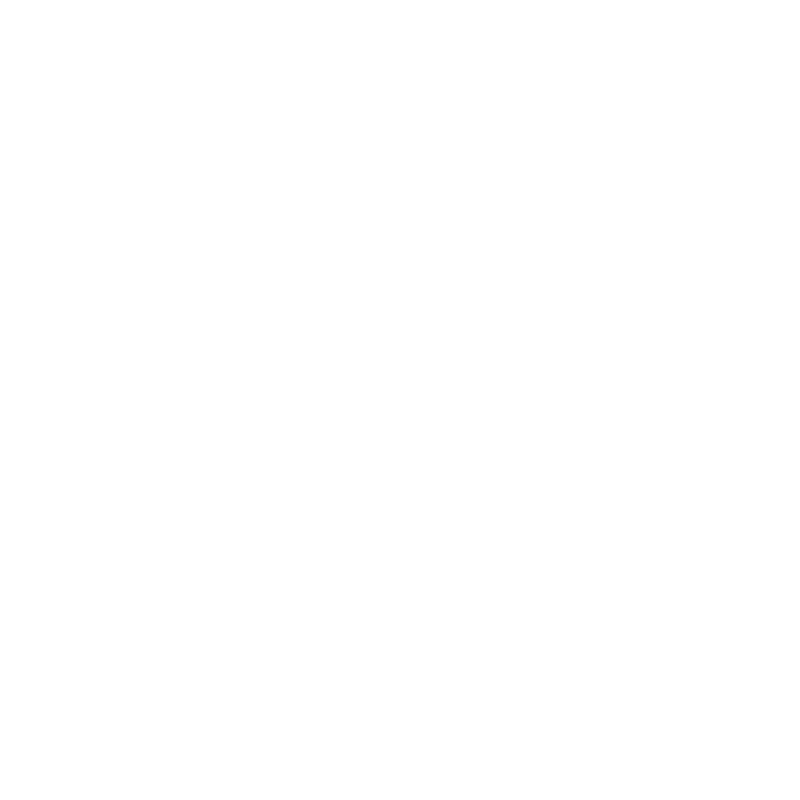

lambda1: 6


<IPython.core.display.Javascript object>


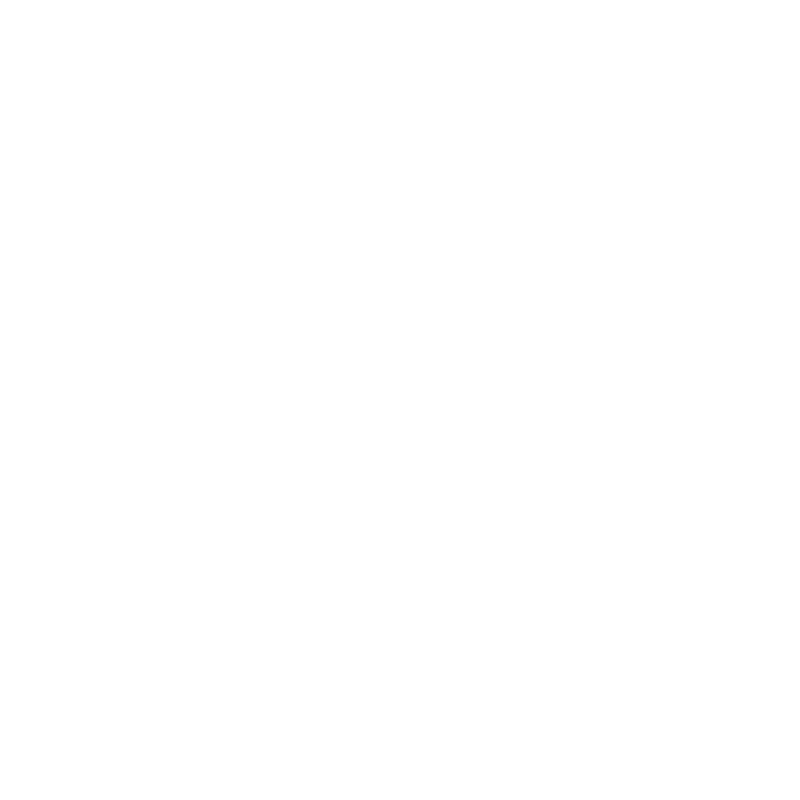

In [264]:
#%% SECTION 4 - Segmentation using level sets (and region homogeneity)

#im=skio.imread('brain.bmp')
#im=im[:,:,1]

im=skio.imread('brain2.bmp')

image = img_as_float(im)

for lambda1 in [4,5,6]:
    print("lambda1:",lambda1)
    # Init avec un damier
    #init_ls = checkerboard_level_set(image.shape, 6)

    # Init avec un cercle
    #init_ls = disk_level_set (image.shape, (120,130), 10)

    # Init avec plusieurs cercles
    circleNum = 8
    circleRadius = image.shape[0] / (3*circleNum)
    circleStep0 = image.shape[0]/(circleNum+1)
    circleStep1 = image.shape[1]/(circleNum+1)
    init_ls = np.zeros(image.shape)
    for i in range(circleNum):
            for j in range(circleNum):
                init_ls = init_ls + disk_level_set (image.shape, 
                                                      center=((i+1)*circleStep0, (j+1)*circleStep1), radius=circleRadius)

    #init_ls = disk_level_set (image.shape, center=(120,130), radius=10)
    #init_ls = checkerboard_level_set(image.shape, 6)
    plt.imshow(init_ls, cmap="gray")

    cv = chan_vese(image, mu=0.25, lambda1=lambda1, lambda2=1, tol=1e-3, max_num_iter=200,
                   dt=0.5, init_level_set=init_ls, extended_output=True)

    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    ax = axes.flatten()

    ax[0].imshow(image, cmap="gray")
    ax[0].set_axis_off()
    ax[0].set_title("Original Image", fontsize=12)

    ax[1].imshow(cv[0], cmap="gray")
    ax[1].set_axis_off()
    title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
    ax[1].set_title(title, fontsize=12)

    ax[2].imshow(cv[1], cmap="gray")
    ax[2].set_axis_off()
    ax[2].set_title("Final Level Set", fontsize=12)

    ax[3].plot(cv[2])
    ax[3].set_title("Evolution of energy over iterations", fontsize=12)

    fig.tight_layout()
    plt.show()

     
#%% END  TP - Deformable Models

mu: 0.15


<IPython.core.display.Javascript object>


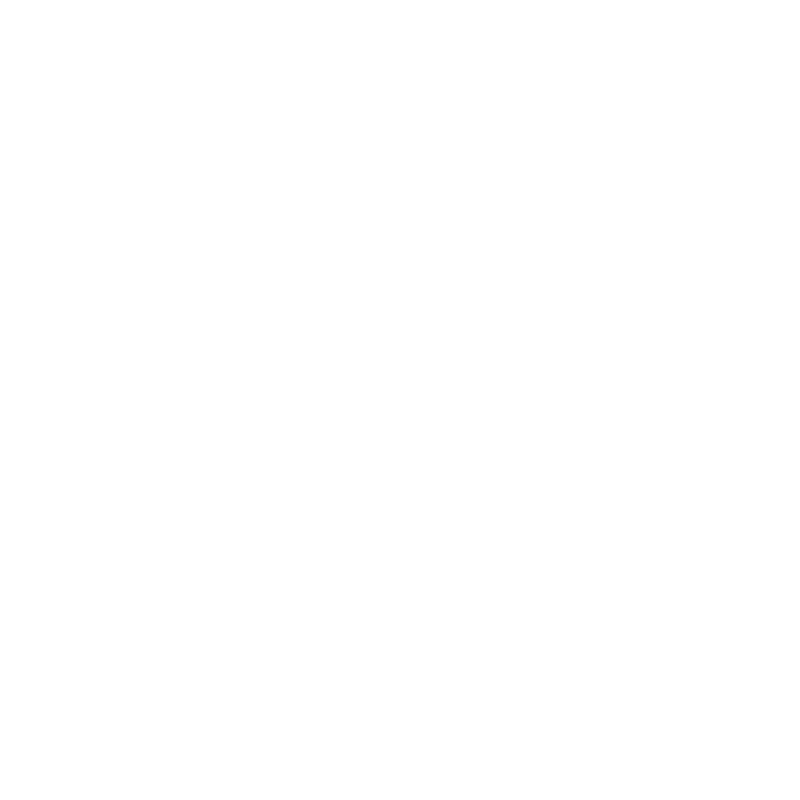

mu: 0.25


<IPython.core.display.Javascript object>


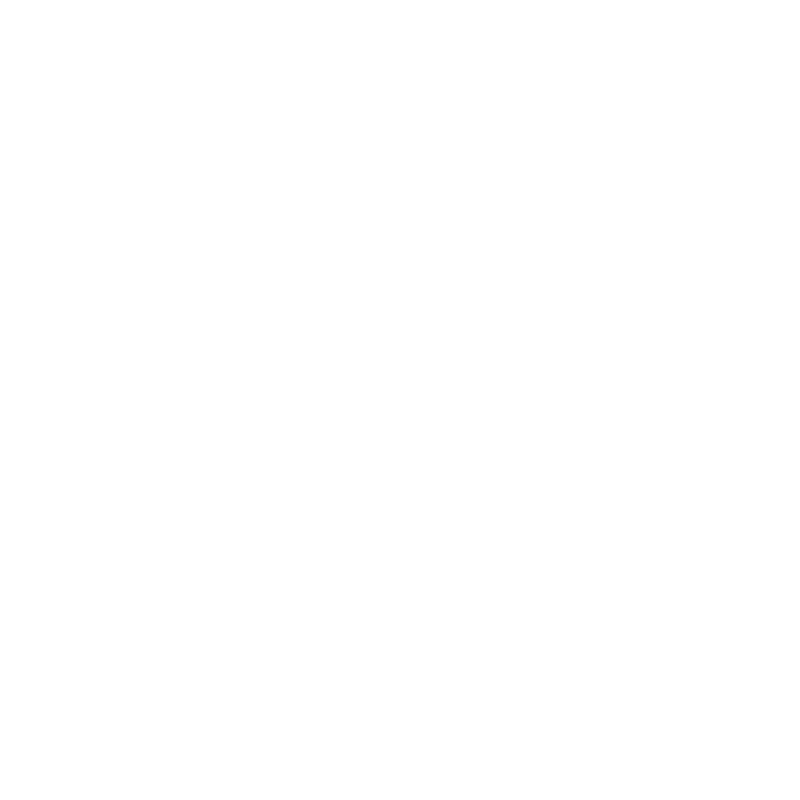

mu: 0.35


<IPython.core.display.Javascript object>


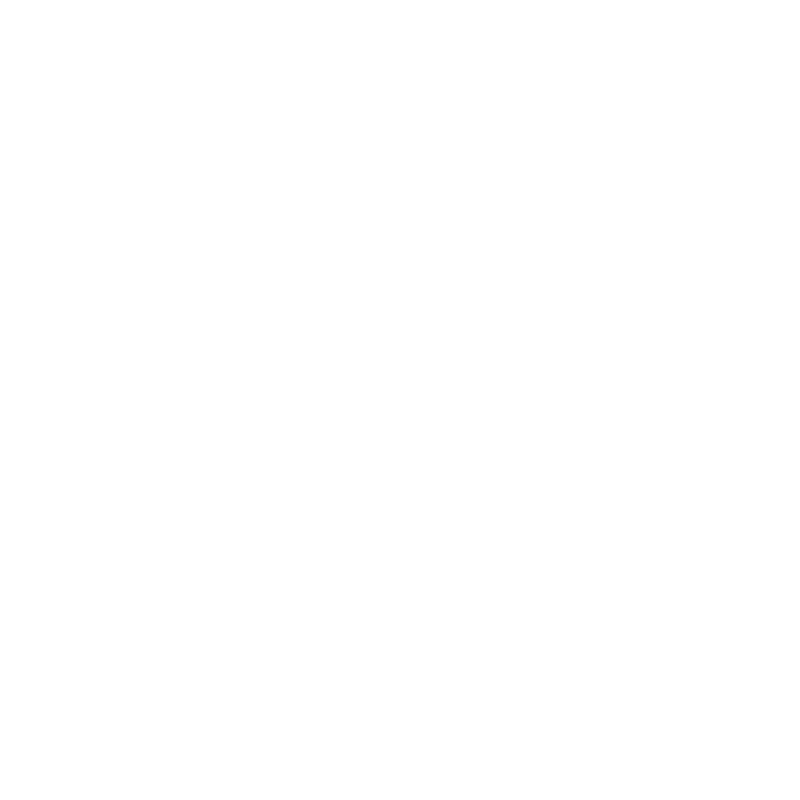

In [265]:
#%% SECTION 4 - Segmentation using level sets (and region homogeneity)

#im=skio.imread('brain.bmp')
#im=im[:,:,1]

im=skio.imread('brain2.bmp')

image = img_as_float(im)

for mu in [0.15,0.25,0.35]:
    print("mu:",mu)
    # Init avec un damier
    #init_ls = checkerboard_level_set(image.shape, 6)

    # Init avec un cercle
    #init_ls = disk_level_set (image.shape, (120,130), 10)

    # Init avec plusieurs cercles
    circleNum = 8
    circleRadius = image.shape[0] / (3*circleNum)
    circleStep0 = image.shape[0]/(circleNum+1)
    circleStep1 = image.shape[1]/(circleNum+1)
    init_ls = np.zeros(image.shape)
    for i in range(circleNum):
            for j in range(circleNum):
                init_ls = init_ls + disk_level_set (image.shape, 
                                                      center=((i+1)*circleStep0, (j+1)*circleStep1), radius=circleRadius)

    #init_ls = disk_level_set (image.shape, center=(120,130), radius=10)
    #init_ls = checkerboard_level_set(image.shape, 6)
    plt.imshow(init_ls, cmap="gray")

    cv = chan_vese(image, mu=mu, lambda1=5, lambda2=1, tol=1e-3, max_num_iter=200,
                   dt=0.5, init_level_set=init_ls, extended_output=True)

    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    ax = axes.flatten()

    ax[0].imshow(image, cmap="gray")
    ax[0].set_axis_off()
    ax[0].set_title("Original Image", fontsize=12)

    ax[1].imshow(cv[0], cmap="gray")
    ax[1].set_axis_off()
    title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
    ax[1].set_title(title, fontsize=12)

    ax[2].imshow(cv[1], cmap="gray")
    ax[2].set_axis_off()
    ax[2].set_title("Final Level Set", fontsize=12)

    ax[3].plot(cv[2])
    ax[3].set_title("Evolution of energy over iterations", fontsize=12)

    fig.tight_layout()
    plt.show()

     
#%% END  TP - Deformable Models

<IPython.core.display.Javascript object>


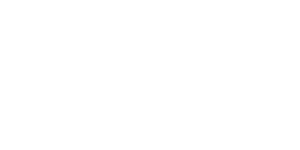

In [266]:
from PIL import Image

%matplotlib notebook
image = Image.open('6Xsubstack38.tif')
image = np.array(image)
image = image[400:480,520:620]
plt.imshow(image,cmap="gray")
plt.show()

200.0 255.0


<IPython.core.display.Javascript object>


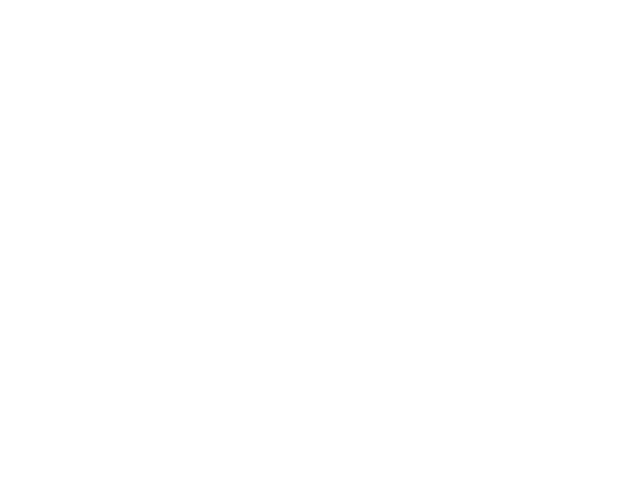

In [267]:
from skimage.filters import median

%matplotlib notebook
image = Image.open('6Xsubstack38.tif')
image = np.array(image)
image = image[400:480,520:620]
image = (image-np.min(image))/(np.max(image)-np.min(image))*255

height,width = image.shape

for row in range(height):
    for col in range(width):
        image[row,col] += 200
        
        if(image[row,col] > 255):
            image[row,col] = 255


print(np.min(image),np.max(image))
plt.imshow(image,cmap="gray")
plt.show()

<IPython.core.display.Javascript object>


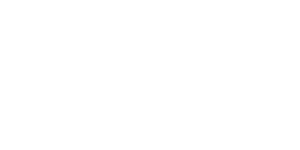

In [268]:
%matplotlib notebook
filtered_img = median(image, morpho.disk(2))

f = plt.figure(figsize=(9,9))

f.add_subplot(1,2, 1)
plt.imshow(image,cmap="gray")

f.add_subplot(1,2, 2)
res_chan_vese = np.array(cv[0])
plt.imshow(filtered_img,cmap="gray")

<IPython.core.display.Javascript object>


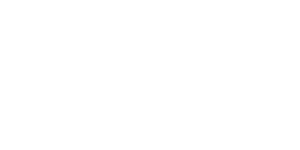

In [269]:
%matplotlib notebook
filtered_img_2 = morpho.opening(filtered_img,morpho.disk(1))

f = plt.figure(figsize=(9,9))

f.add_subplot(1,2, 1)
plt.imshow(image,cmap="gray")

f.add_subplot(1,2, 2)
res_chan_vese = np.array(cv[0])
plt.imshow(filtered_img_2,cmap="gray")

In [270]:
%matplotlib notebook
cv = chan_vese(filtered_img_2, mu=0, lambda1=3, lambda2=1, tol=1e-3, max_num_iter=200,
                   dt=0.5, init_level_set=init_ls, extended_output=True)
res_chan_vese = np.array(cv[0])


f = plt.figure(figsize=(9,9))

f.add_subplot(1,2, 1)
plt.imshow(image,cmap="gray")

f.add_subplot(1,2, 2)
res_chan_vese = np.array(cv[0])
plt.imshow(255-res_chan_vese,cmap="gray")

ValueError: The dimensions of initial level set do not match the dimensions of image.

In [ ]:
# Init avec un damier
init_ls = checkerboard_level_set(image.shape, 6)

# Init avec un cercle
#init_ls = disk_level_set (image.shape, (120,130), 10)

#init_ls = disk_level_set (image.shape, center=(120,130), radius=10)
#init_ls = checkerboard_level_set(image.shape, 6)

In [ ]:
%matplotlib notebook
im=skio.imread('brain.bmp')
im=im[:,:,1]

plt.imshow(im,cmap="gray")
plt.show()

In [ ]:
%matplotlib notebook

filtered_img = im.copy()

N=7
for k in range(N):
    se=morpho.disk(k)
    filtered_img=morpho.closing(morpho.opening(filtered_img,se),se)
plt.imshow(filtered_img,cmap="gray")

In [ ]:
%matplotlib notebook

# Init avec un cercle
init_ls = disk_level_set (filtered_img.shape, center=(220,220), radius=10)

plt.imshow(init_ls,cmap="gray")
plt.show()

In [ ]:
%matplotlib notebook

cv = chan_vese(filtered_img, mu=0, lambda1=3, lambda2=1, tol=1e-3, max_num_iter=200,
                   dt=0.5, init_level_set=init_ls, extended_output=True)
res_chan_vese = np.array(cv[0])

plt.imshow(res_chan_vese,cmap="gray")
plt.show()